### Importing all the required dependencies

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Getting FashionMNIST data from the torch datasets

In [2]:
train_data = datasets.FashionMNIST(root = 'data',
                                   train = True,
                                   download = True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform = None)

test_data = datasets.FashionMNIST(root = 'data',
                                   train = False,
                                   download = True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform = None)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
# seeing the first training example

image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f'Image shape: {image.shape}')

Image shape: torch.Size([1, 28, 28])


In [9]:
print(f'Image label: {class_names[label]}')

Image label: Ankle boot


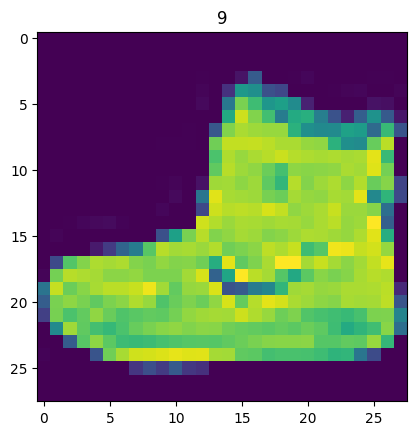

In [10]:
image,label = train_data[0]
#plt.imshow(image) ---> TypeError: Invalid shape (1, 28, 28) for image data

plt.imshow(image.squeeze())
plt.title(label);
plt.show()

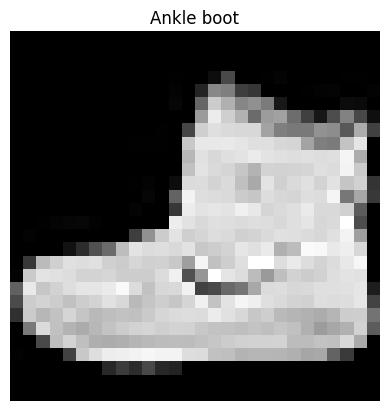

In [11]:
plt.imshow(image.squeeze(),cmap = 'gray')
plt.title(class_names[label]);
plt.axis(False);

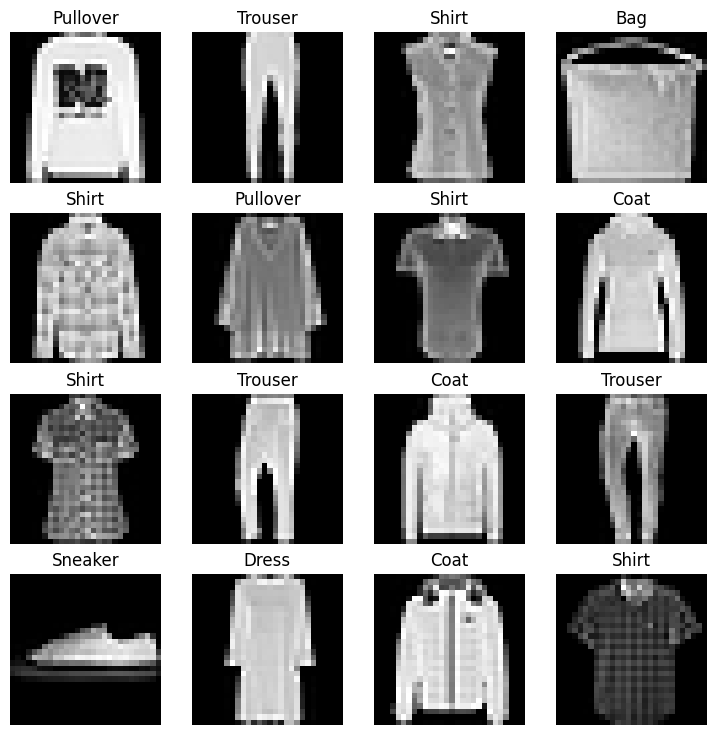

In [12]:
torch.manual_seed(7)
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False);


In [13]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [15]:
from torch.utils.data import DataLoader

Batch_size = 16

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = Batch_size,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = Batch_size,
                              shuffle = False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x245b501bfd0>,
 <torch.utils.data.dataloader.DataLoader at 0x245b4fefa00>)

In [16]:
print(f'DataLoaders : {train_dataloader,test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {Batch_size}...')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {Batch_size}...')

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x00000245B501BFD0>, <torch.utils.data.dataloader.DataLoader object at 0x00000245B4FEFA00>)
Length of train_dataloader: 3750 batches of 16...
Length of test_dataloader: 625 batches of 16...


In [17]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

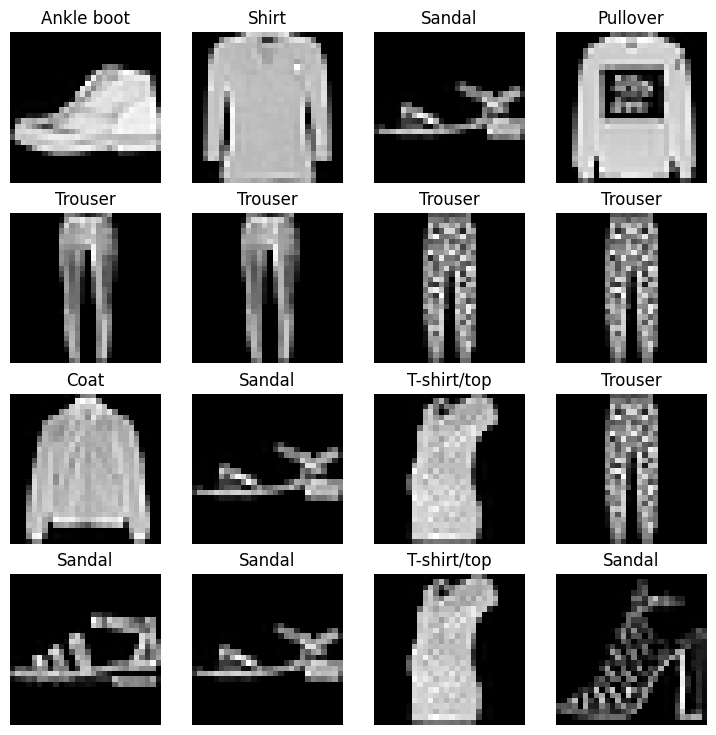

In [18]:
torch.manual_seed(7)
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
    img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False);

In [19]:
# Base line model

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f'shape before flattening: {x.shape}')

print(f'shape before flattening: {output.shape}')

shape before flattening: torch.Size([1, 28, 28])
shape before flattening: torch.Size([1, 784])


In [20]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0588, 0.6706, 0.9294, 0.7765, 0.7098, 0.6118, 0.6157, 0.7725, 0.9059,
        0.6353, 0.1529, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.6980, 0.8941, 0.8745, 0.8510, 0.9529, 0.9686, 0.9333, 0.9529, 1.0000,
        0.8745, 0.8314, 0.8784, 0.8039, 0.0118, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1804, 0.9059, 0.8353, 0.8627, 0.8627, 0.8627, 0.8980, 0.8471, 0.9412,
        0.9255, 0.7765, 0.8235, 0.7804, 0.8784, 0.6000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.2902, 0.8745, 0.8353, 0.8510, 0.8353, 0.8196, 0.8667, 0.9765,
        0.9020, 0.7843, 0.8118, 0.8000, 0.7843, 0.8196, 0.7098, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [21]:
from torch import nn

class FashionMNISTV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            nn.Linear(in_features = hidden_units,
                      out_features = output_shape)
        )
        
    def forward(self,x):
        return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

model_0 = FashionMNISTV0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_names)
).to('cpu')

model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)
#model_0(dummy_x).shape

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [25]:
# setting up loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.01)

In [26]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [27]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [28]:
#import tqdm for progress bar

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 10

# training loop

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-----')
    
    train_loss = 0
    # add a loop to loop through thr training batches
    
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        
        # 1.Forward pass
        y_pred = model_0(X)
        
        # 2. calculate the loss(per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        
        # 3. Optimizer zero_grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader)} samples.')
        
    train_loss /= len(train_dataloader)
    
    test_loss,test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            
            # 1. Forward pass
            test_pred = model_0(X_test)
            
            # 2. Calculate loss
            test_loss += loss_fn(test_pred,y_test)
            
            # 3. Calcualte accuracy
            test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))
            
        test_loss /= len(test_dataloader)
        
        test_acc /= len(test_dataloader)
        
    print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f},Test acc: {test_acc:.4f}')

    
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))
                                            

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/3750 samples.
Looked at 6400/3750 samples.
Looked at 12800/3750 samples.
Looked at 19200/3750 samples.
Looked at 25600/3750 samples.
Looked at 32000/3750 samples.
Looked at 38400/3750 samples.
Looked at 44800/3750 samples.
Looked at 51200/3750 samples.
Looked at 57600/3750 samples.

Train loss: 0.7405 | Test loss: 0.5480,Test acc: 81.0300
Epoch: 1
-----
Looked at 0/3750 samples.
Looked at 6400/3750 samples.
Looked at 12800/3750 samples.
Looked at 19200/3750 samples.
Looked at 25600/3750 samples.
Looked at 32000/3750 samples.
Looked at 38400/3750 samples.
Looked at 44800/3750 samples.
Looked at 51200/3750 samples.
Looked at 57600/3750 samples.

Train loss: 0.4989 | Test loss: 0.4970,Test acc: 82.5500
Epoch: 2
-----
Looked at 0/3750 samples.
Looked at 6400/3750 samples.
Looked at 12800/3750 samples.
Looked at 19200/3750 samples.
Looked at 25600/3750 samples.
Looked at 32000/3750 samples.
Looked at 38400/3750 samples.
Looked at 44800/3750 samples.
Looked at 5120

In [29]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim =1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {'model_name': model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc':acc}

model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4539719223976135,
 'model_acc': 84.17}

In [30]:
!nvidia-smi

Wed Feb 15 12:30:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P5    18W /  80W |    474MiB /  6144MiB |     30%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [31]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [32]:
class FashionMNISTV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units,
                      out_features = output_shape),
            nn.ReLU()
        )
        
    def forward(self,x):
        return self.layer_stack(x)

In [33]:
torch.manual_seed(42)
model_1 = FashionMNISTV1(input_shape = 784,
                         hidden_units = 10,
                         output_shape = len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr = 0.01)

In [35]:
def train_step_func(model: torch.nn.Module,
                    data_loader: torch.utils.data.DataLoader,
                    loss_fn: torch.nn.Module,
                    optimizer: torch.optim.Optimizer,
                    accuracy_fn,
                    device: torch.device = device):
    
    train_loss , train_acc = 0,0
    # add a loop to loop through thr training batches
    
    model_0.train()
    
    for batch,(X,y) in enumerate(data_loader):
        X,y = X.to(device),y.to(device)
        
        # 1.Forward pass(outputs the raw logits from the model)
        y_pred = model(X)
        
        # 2. calculate the loss(per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))# goes from logits to prediction labels
        
        # 3. Optimizer zero_grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f} | train accuracy {train_acc:.2f}%')

In [36]:
def test_step_func(model: torch.nn.Module,
                    data_loader: torch.utils.data.DataLoader,
                    loss_fn: torch.nn.Module,
                    accuracy_fn,
                    device: torch.device = device):
    
    test_loss,test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device),y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,
                                   y_pred = test_pred.argmax(dim=1))
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'test loss: {test_loss:.5f} | test accuracy {test_acc:.2f}%')
    

In [37]:
torch.manual_seed(42)

# measuring time

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-----')
    train_step_func(model = model_1,
                    data_loader = train_dataloader,
                    loss_fn = loss_fn,
                    optimizer = optimizer,
                    accuracy_fn = accuracy_fn,
                    device = device)
    
    test_step_func(model = model_1,
                    data_loader = test_dataloader,
                    loss_fn = loss_fn,
                    accuracy_fn = accuracy_fn,
                    device = device)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.23272 | train accuracy 58.92%
test loss: 1.00110 | test accuracy 64.96%
Epoch: 1
-----
Train loss: 0.95304 | train accuracy 65.92%
test loss: 0.94208 | test accuracy 65.77%
Epoch: 2
-----
Train loss: 0.91299 | train accuracy 66.85%
test loss: 0.92694 | test accuracy 66.09%
Epoch: 3
-----
Train loss: 0.89416 | train accuracy 67.28%
test loss: 0.90721 | test accuracy 66.74%
Epoch: 4
-----
Train loss: 0.88073 | train accuracy 67.58%
test loss: 0.90306 | test accuracy 66.43%
Epoch: 5
-----
Train loss: 0.86969 | train accuracy 67.91%
test loss: 0.89021 | test accuracy 66.89%
Epoch: 6
-----
Train loss: 0.86067 | train accuracy 68.12%
test loss: 0.88830 | test accuracy 67.01%
Epoch: 7
-----
Train loss: 0.85357 | train accuracy 68.30%
test loss: 0.88039 | test accuracy 67.23%
Epoch: 8
-----
Train loss: 0.84583 | train accuracy 68.59%
test loss: 0.87537 | test accuracy 67.49%
Epoch: 9
-----
Train loss: 0.83936 | train accuracy 68.70%
test loss: 0.86873 | test accura

In [38]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4539719223976135,
 'model_acc': 84.17}

In [39]:
total_train_time_model_0

64.3312994

In [40]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device = device):
    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y = X.to(device),y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim =1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {'model_name': model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc':acc}

In [41]:
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

  0%|          | 0/625 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.8687295913696289,
 'model_acc': 67.67}

In [42]:
# creating a CNN

class FashionMNISTV2(nn.Module):
    
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.cnn_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
       )
        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7,
                      out_features = output_shape)
        )
        
        
    def forward(self,x):
        x = self.cnn_block_1(x)
        #print(f'output shape of cnn_block_1: {x.shape}')
        x = self.cnn_block_2(x)
        #print(f'output shape of cnn_block_2: {x.shape}')
        x = self.classifier(x)
        #print(f'output shape of classifier: {x.shape}')
        return x
     

In [43]:
image.shape

torch.Size([1, 28, 28])

In [44]:
torch.manual_seed(42)
model_2 = FashionMNISTV2(input_shape = 1,
                         hidden_units = 20,
                         output_shape = len(class_names)).to(device)
model_2

FashionMNISTV2(
  (cnn_block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
)

In [45]:
model_2.state_dict()

OrderedDict([('cnn_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
       

In [46]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr = 0.01)

In [47]:
torch.manual_seed(42)

# measuring time

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-----')
    train_step_func(model = model_2,
                    data_loader = train_dataloader,
                    loss_fn = loss_fn,
                    optimizer = optimizer,
                    accuracy_fn = accuracy_fn,
                    device = device)
    
    test_step_func(model = model_2,
                    data_loader = test_dataloader,
                    loss_fn = loss_fn,
                    accuracy_fn = accuracy_fn,
                    device = device)
    
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.80543 | train accuracy 70.94%
test loss: 0.43680 | test accuracy 84.78%
Epoch: 1
-----
Train loss: 0.40166 | train accuracy 85.41%
test loss: 0.37570 | test accuracy 86.36%
Epoch: 2
-----
Train loss: 0.34966 | train accuracy 87.37%
test loss: 0.34517 | test accuracy 87.63%
Epoch: 3
-----
Train loss: 0.32161 | train accuracy 88.38%
test loss: 0.33433 | test accuracy 87.97%
Epoch: 4
-----
Train loss: 0.30216 | train accuracy 89.17%
test loss: 0.32057 | test accuracy 88.81%
Epoch: 5
-----
Train loss: 0.28765 | train accuracy 89.67%
test loss: 0.31734 | test accuracy 88.84%
Epoch: 6
-----
Train loss: 0.27594 | train accuracy 90.19%
test loss: 0.30056 | test accuracy 89.52%
Epoch: 7
-----
Train loss: 0.26734 | train accuracy 90.38%
test loss: 0.29095 | test accuracy 89.61%
Epoch: 8
-----
Train loss: 0.25753 | train accuracy 90.77%
test loss: 0.29329 | test accuracy 89.73%
Epoch: 9
-----
Train loss: 0.25037 | train accuracy 90.87%
test loss: 0.29713 | test accura

In [48]:
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_2_results

  0%|          | 0/625 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.29713037610054016,
 'model_acc': 89.25}

In [49]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.4539719223976135,
 'model_acc': 84.17}

In [50]:
model_1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.8687295913696289,
 'model_acc': 67.67}

In [51]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.453972,84.17
1,FashionMNISTV1,0.868730,67.67
2,FashionMNISTV2,0.297130,89.25


In [52]:
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [53]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.453972,84.17,64.331299
1,FashionMNISTV1,0.868730,67.67,105.217639
2,FashionMNISTV2,0.297130,89.25,147.608901


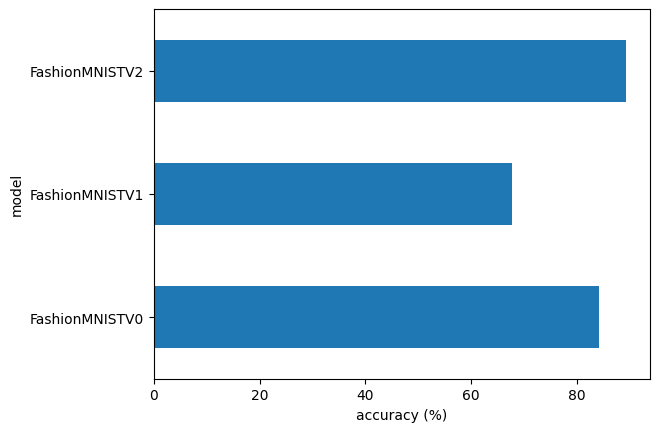

In [54]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [55]:
def make_predictions(model: torch.nn.Module,
                     data : list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim =0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim = 0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [56]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample,label  in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
test_samples[0].shape

torch.Size([1, 28, 28])

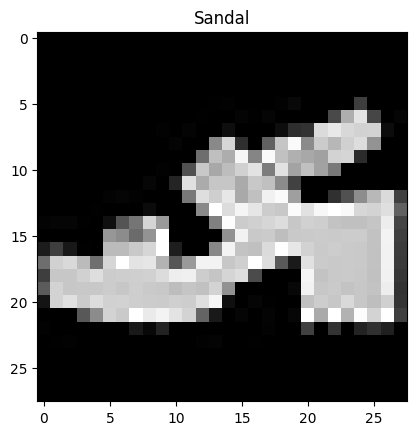

In [57]:
plt.imshow(test_samples[0].squeeze(),cmap = 'gray')
plt.title(class_names[test_labels[0]])
plt.show()

In [58]:
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

pred_probs[:2]

tensor([[1.9896e-09, 2.2324e-11, 2.9961e-10, 9.5356e-11, 1.1161e-08, 9.9958e-01,
         3.3293e-07, 1.6776e-08, 3.9847e-06, 4.1725e-04],
        [9.5746e-03, 9.7512e-01, 6.7180e-05, 1.1712e-02, 9.2274e-04, 1.1527e-05,
         2.5192e-03, 1.6003e-05, 4.7649e-05, 7.2656e-06]])

In [59]:
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 6, 4, 7, 1])

In [60]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

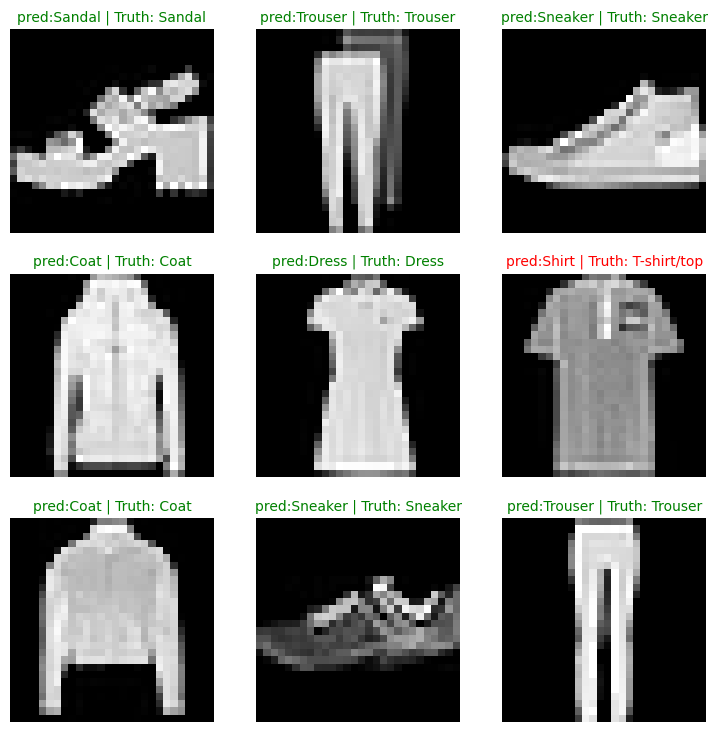

In [61]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i ,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap = 'gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f'pred:{pred_label} | Truth: {truth_label}'
    if pred_label == truth_label:
        plt.title(title_text,fontsize = 10, c = 'g')
    else:
        plt.title(title_text,fontsize = 10, c = 'r')
        
    plt.axis(False);

In [62]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc = 'Making predictions'):
        X,y = X.to(device),y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(),dim = 0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
        

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions:   0%|          | 0/625 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 0, 0, 4, 6, 5, 7])

In [63]:
len(y_pred_tensor)

10000

In [65]:
try:
    import torchmetrics,mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    assert int(mlxtend.__version__.split(".")[1]) >= 19, 'mlxtend version should br 0.19.0 or higher'
except:
    !pip install torchmetrics -U mlxtend
    import torchmetrics,mlxtend

     -------------------------------------- 517.2/517.2 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 4.5 MB/s eta 0:00:00


In [66]:
import mlxtend
print(mlxtend.__version__)

0.21.0


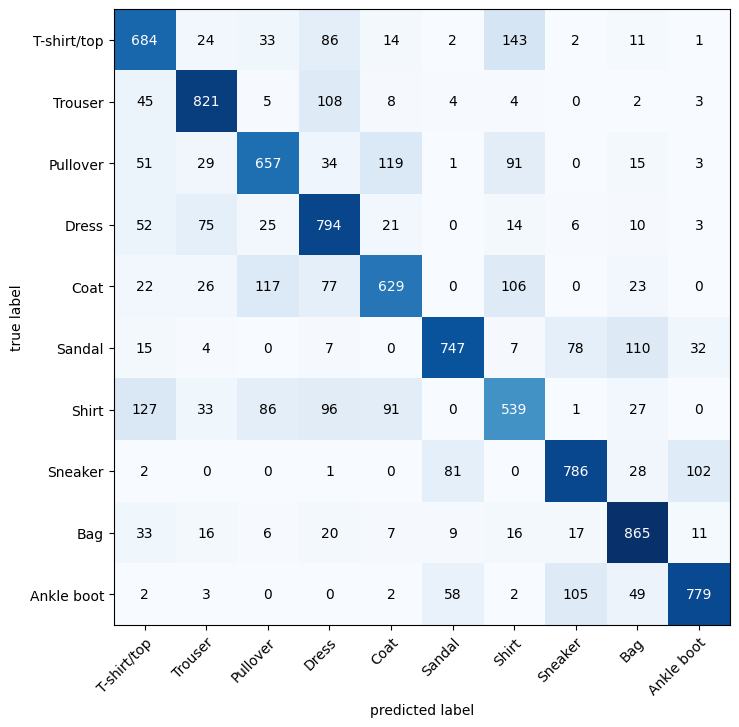

In [70]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

con_mat =ConfusionMatrix(num_classes = len(class_names),task='multiclass')
con_mat_tensor = con_mat(preds = y_pred_tensor,
                         target = test_data.targets)
fig,ax = plot_confusion_matrix(
    conf_mat = con_mat_tensor.numpy(),
    class_names = class_names,
    figsize = (10,8)
)

In [77]:
# saving a model
import os
from pathlib import Path

model_path = Path('C:/Users/prash/PyTorch/models')

model_name = 'PyTorch_computer_vision_model_2.pt'
model_save_path = model_path/ model_name

model_save_path

print(f'saving model to:{model_save_path}')
torch.save(model_2.state_dict(), model_save_path)

saving model to:C:\Users\prash\PyTorch\models\PyTorch_computer_vision_model_2.pt


In [78]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTV2(input_shape = 1,
                         hidden_units = 20,
                         output_shape = len(class_names))
loaded_model_2.load_state_dict(torch.load(f=model_save_path))
loaded_model_2.to(device)

FashionMNISTV2(
  (cnn_block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
)

In [79]:
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.29713037610054016,
 'model_acc': 89.25}

In [81]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_model_2_results

  0%|          | 0/625 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.29713037610054016,
 'model_acc': 89.25}